In [ ]:
##绘制图6，对四节电池电池的shap值进行叠加处理

In [7]:

import numpy as np

file_path = 'shapXGB191012.txt'

first_column = data[:30].flatten()
second_column = data[30:60].flatten()
three_column = data[60:90].flatten()
four_column = data[90:120].flatten()
# 合并两列为一个（120, 2）的矩阵
combined_data = np.column_stack((first_column, second_column,three_column,four_column))
# 保存新数据为 txt 文件
np.savetxt('shapXGB191012_good.txt', combined_data, fmt='%f')

In [8]:
combined_data


array([[1.50236875e-01, 7.10044265e-01, 1.19851686e-01, 6.72252923e-02],
       [1.62849084e-01, 2.51984417e-01, 2.04432029e-02, 4.80938591e-02],
       [3.95473927e-01, 1.19448323e-02, 6.45710602e-02, 7.23329857e-02],
       [4.39286172e-01, 3.09457188e-03, 3.81936044e-01, 7.48529583e-02],
       [1.27675096e-02, 5.71760861e-03, 3.76057476e-02, 1.71190575e-02],
       [4.61779647e-02, 9.42685059e-04, 1.72278881e-01, 3.42383236e-03],
       [3.11430544e-03, 1.19140401e-01, 2.28041015e-03, 3.39317555e-03],
       [1.78992620e-03, 5.04428089e-01, 7.94171020e-02, 4.14303597e-03],
       [1.44221867e-02, 5.70739293e-03, 1.16585158e-02, 8.74922116e-05],
       [1.87169220e-02, 6.81677740e-03, 3.36494879e-03, 6.25593821e-03],
       [3.12379649e-04, 1.29483845e-02, 4.77375202e-02, 7.30526284e-04],
       [3.16435657e-03, 4.18942384e-02, 2.10412173e-03, 9.15309880e-03],
       [5.11314673e-03, 3.67039442e-01, 2.43575568e-03, 1.11686031e-03],
       [1.19370339e-03, 2.69104578e-02, 4.87569571e

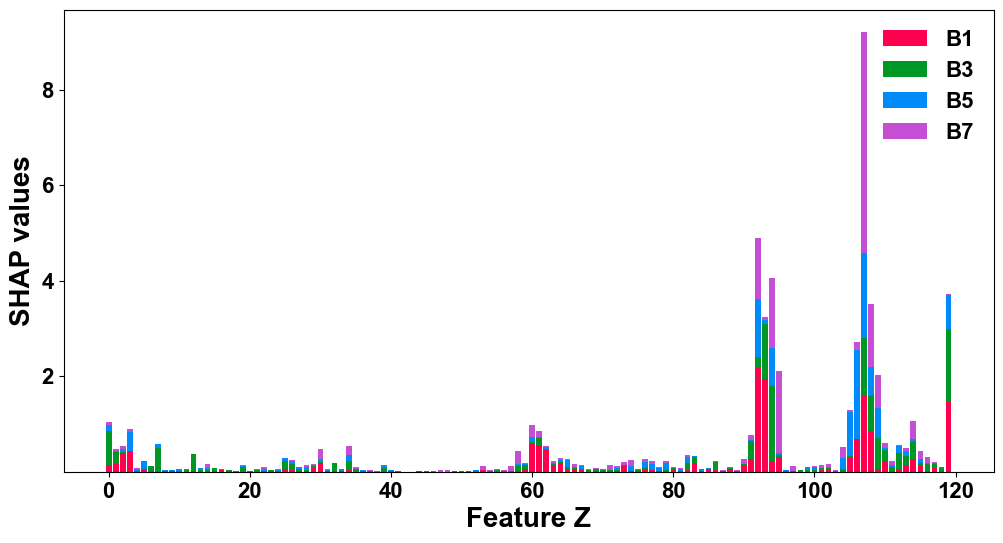

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(family='Arial', weight='bold', size=16)
# Assuming combined_data is already defined as per your previous code
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)
orangese = (255/255, 127/255, 14/255,1)

# Add the sum of each row as the fifth column
sum_column = combined_data.sum(axis=1)
data_with_sum = np.column_stack((combined_data, sum_column))

k = 120  # Number of top rows to select and plot

# Select indices of the top k rows from the fifth column
top_k_indices = np.argsort(-data_with_sum[:, 4])[:k]

# Sort the top k indices
sorted_top_k_indices = np.sort(top_k_indices)

# Extract the sorted top k rows of data
sorted_top_k_data = data_with_sum[sorted_top_k_indices, :4]

# Plot the stacked bar chart
x_sorted = np.arange(k)  # x-axis indices for sorted data
bottom_sorted = np.zeros(k)  # Bottom height for the stacked bar chart
colors = [redse, greense, bluese, purplese]
label = ['B1','B3','B5','B7']
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.bar(x_sorted, sorted_top_k_data[:, i], bottom=bottom_sorted, color=colors[i],label=label[i])
    bottom_sorted += sorted_top_k_data[:, i]

plt.xlabel('Feature Z', fontproperties=font, fontsize=20)
plt.ylabel('SHAP values', fontproperties=font, fontsize=20)

plt.xticks(fontproperties=font)
# plt.xticks(x_sorted, sorted_top_k_indices, fontproperties=font)
plt.yticks(fontproperties=font)
# # Set the y-axis to logarithmic scale
# plt.yscale('log')
# Set the y-axis limits to 0 and 5
# plt.ylim(0, 5)
plt.legend(prop=font, facecolor='white', frameon=False)
# plt.savefig( f"120特征shap值叠加图.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"120特征shap值叠加图.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

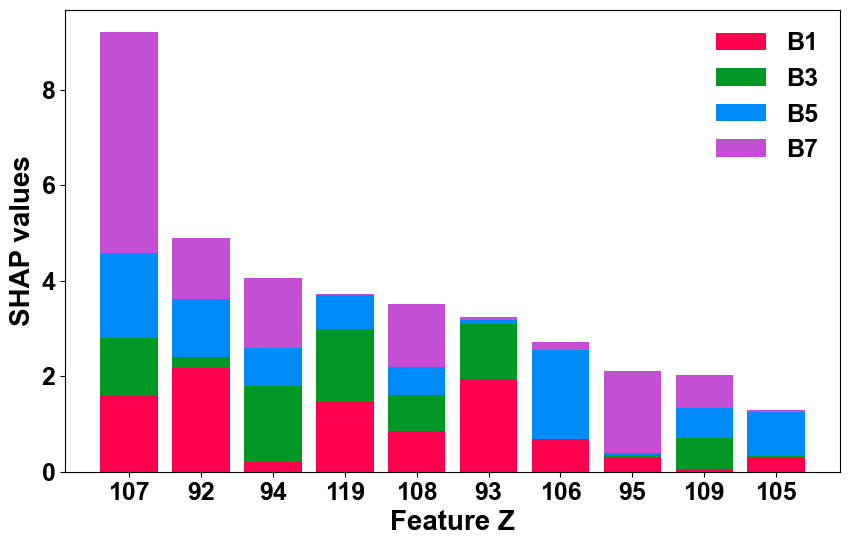

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(family='Arial', weight='bold', size=18)
# Assuming combined_data is already defined as per your previous code
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)
orangese = (255/255, 127/255, 14/255,1)

# Add the sum of each row as the fifth column
sum_column = combined_data.sum(axis=1)
data_with_sum = np.column_stack((combined_data, sum_column))

k = 10  # Number of top rows to select and plot

# Assuming data_with_sum and sum_column are already defined

# Sort indices by the sum column in descending order
sorted_indices_by_sum = np.argsort(-sum_column)[:k]

# Extract the top k rows based on the sorted order
sorted_data_by_sum = data_with_sum[sorted_indices_by_sum, :4]

# Plot the stacked bar chart
x_sorted_by_sum = np.arange(k)  # x-axis indices for sorted data
bottom_sorted_by_sum = np.zeros(k)  # Bottom height for the stacked bar chart
colors = [redse, greense, bluese, purplese]
label = ['B1','B3','B5','B7']
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.bar(x_sorted_by_sum, sorted_data_by_sum[:, i], bottom=bottom_sorted_by_sum, color=colors[i], label=label[i])
    bottom_sorted_by_sum += sorted_data_by_sum[:, i]

plt.xlabel('Feature Z', fontproperties=font, fontsize=20)
plt.ylabel('SHAP values', fontproperties=font, fontsize=20)
plt.xticks(x_sorted_by_sum, sorted_indices_by_sum, fontproperties=font)
plt.yticks(fontproperties=font)
plt.legend(prop=font, facecolor='white', frameon=False)
# plt.savefig( f"前10阻抗叠加图.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"前10阻抗叠加图.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()


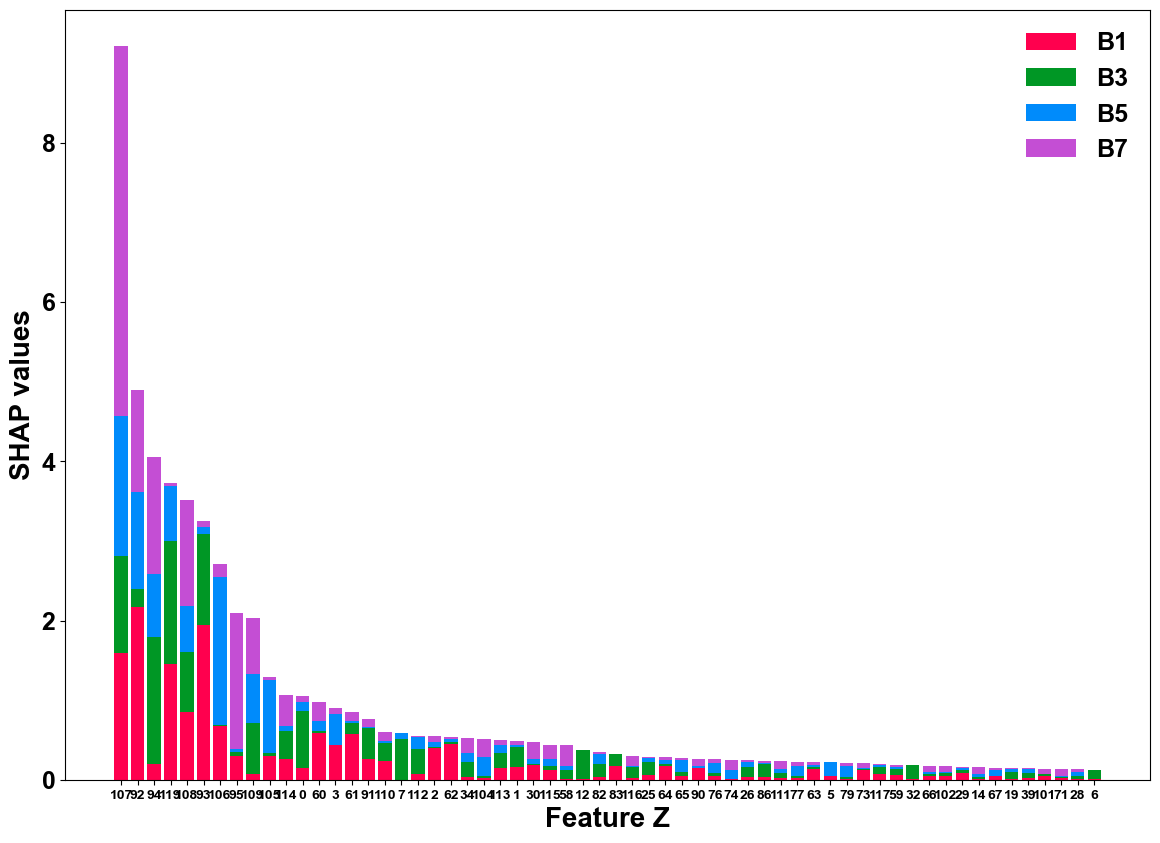

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(family='Arial', weight='bold', size=18)
# Assuming combined_data is already defined as per your previous code
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)
orangese = (255/255, 127/255, 14/255,1)

# Add the sum of each row as the fifth column
sum_column = combined_data.sum(axis=1)
data_with_sum = np.column_stack((combined_data, sum_column))

k = 60  # Number of top rows to select and plot

# Assuming data_with_sum and sum_column are already defined

# Sort indices by the sum column in descending order
sorted_indices_by_sum = np.argsort(-sum_column)[:k]

# Extract the top k rows based on the sorted order
sorted_data_by_sum = data_with_sum[sorted_indices_by_sum, :4]

# Plot the stacked bar chart
x_sorted_by_sum = np.arange(k)  # x-axis indices for sorted data
bottom_sorted_by_sum = np.zeros(k)  # Bottom height for the stacked bar chart
colors = [redse, greense, bluese, purplese]
label = ['B1','B3','B5','B7']
plt.figure(figsize=(14, 10))
for i in range(4):
    plt.bar(x_sorted_by_sum, sorted_data_by_sum[:, i], bottom=bottom_sorted_by_sum, color=colors[i], label=label[i])
    bottom_sorted_by_sum += sorted_data_by_sum[:, i]

plt.xlabel('Feature Z', fontproperties=font, fontsize=20)
plt.ylabel('SHAP values', fontproperties=font, fontsize=20)
plt.xticks(x_sorted_by_sum, sorted_indices_by_sum, fontproperties=font, fontsize=10)
plt.yticks(fontproperties=font)
plt.legend(prop=font, facecolor='white', frameon=False)
# plt.savefig( f"前10阻抗叠加图.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"前10阻抗叠加图.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()


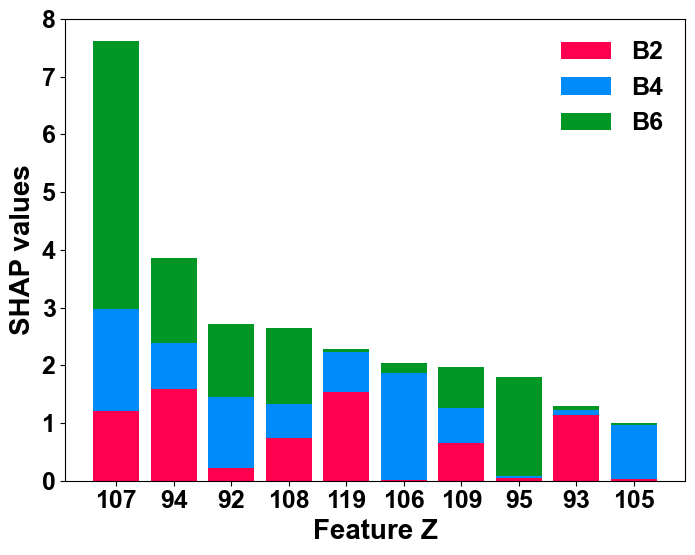

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


file_path = 'shapXGB191012.txt'

# first_column = data[:30].flatten()
second_column = data[30:60].flatten()
three_column = data[60:90].flatten()
four_column = data[90:120].flatten()
# 合并两列为一个（120, 2）的矩阵
combined_data = np.column_stack((second_column, three_column,four_column))

font = FontProperties(family='Arial', weight='bold', size=18)
# Assuming combined_data is already defined as per your previous code
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)
orangese = (255/255, 127/255, 14/255,1)

# Add the sum of each row as the fifth column
sum_column = combined_data.sum(axis=1)
data_with_sum = np.column_stack((combined_data, sum_column))

k = 10  # Number of top rows to select and plot

# Assuming data_with_sum and sum_column are already defined

# Sort indices by the sum column in descending order
sorted_indices_by_sum = np.argsort(-sum_column)[:k]

# Extract the top k rows based on the sorted order
sorted_data_by_sum = data_with_sum[sorted_indices_by_sum, :3]

# Plot the stacked bar chart
x_sorted_by_sum = np.arange(k)  # x-axis indices for sorted data
bottom_sorted_by_sum = np.zeros(k)  # Bottom height for the stacked bar chart
colors = [redse, bluese,  greense]
label = ['B2','B4','B6']
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.bar(x_sorted_by_sum, sorted_data_by_sum[:, i], bottom=bottom_sorted_by_sum, color=colors[i], label=label[i])
    bottom_sorted_by_sum += sorted_data_by_sum[:, i]

plt.xlabel('Feature Z', fontproperties=font, fontsize=20)
plt.ylabel('SHAP values', fontproperties=font, fontsize=20)
plt.xticks(x_sorted_by_sum, sorted_indices_by_sum, fontproperties=font)
plt.yticks(fontproperties=font)
plt.legend(prop=font, facecolor='white', frameon=False)
# plt.savefig( f"从高到低SHAP柱状.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"从高到低SHAP柱状.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

In [31]:
#[107,92,94,119,108,93,106,95,109,105]

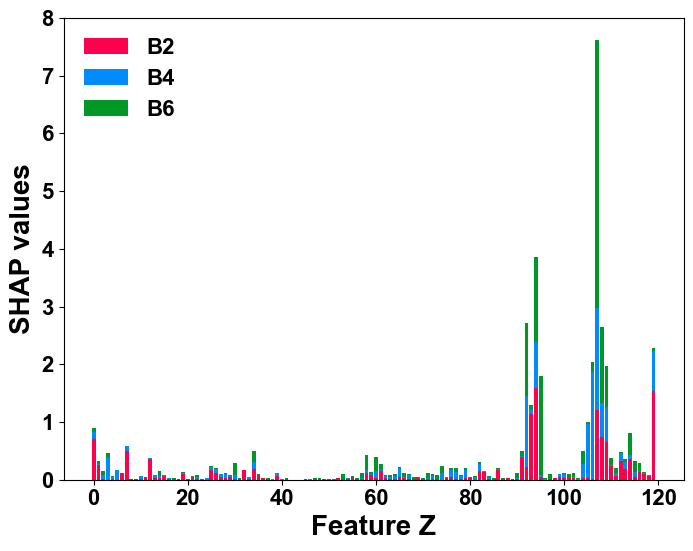

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(family='Arial', weight='bold', size=16)
# Assuming combined_data is already defined as per your previous code
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)
orangese = (255/255, 127/255, 14/255,1)

# Add the sum of each row as the fifth column
sum_column = combined_data.sum(axis=1)
data_with_sum = np.column_stack((combined_data, sum_column))

k = 120  # Number of top rows to select and plot

# Select indices of the top k rows from the fifth column
top_k_indices = np.argsort(-data_with_sum[:, 3])[:k]

# Sort the top k indices
sorted_top_k_indices = np.sort(top_k_indices)

# Extract the sorted top k rows of data
sorted_top_k_data = data_with_sum[sorted_top_k_indices, :3]

# Plot the stacked bar chart
x_sorted = np.arange(k)  # x-axis indices for sorted data
bottom_sorted = np.zeros(k)  # Bottom height for the stacked bar chart
colors = [redse, bluese,  greense]
label = ['B2','B4','B6']
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.bar(x_sorted, sorted_top_k_data[:, i], bottom=bottom_sorted, color=colors[i],label=label[i])
    bottom_sorted += sorted_top_k_data[:, i]

plt.xlabel('Feature Z', fontproperties=font, fontsize=20)
plt.ylabel('SHAP values', fontproperties=font, fontsize=20)

plt.xticks(fontproperties=font)
# plt.xticks(x_sorted, sorted_top_k_indices, fontproperties=font)
plt.yticks(fontproperties=font)
plt.legend(prop=font, facecolor='white', frameon=False)
# plt.savefig( f"按照特征序排序SHAP柱状60个.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"按照特征序排序SHAP柱状60个.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()